# Exploratory Data Analysis (EDA) on PLNT21 Data

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from util.data_cleaner import DataCleaner

In [19]:
# Load the data
plnt21_data = pd.read_excel("../data/eGRID2021_data.xlsx", sheet_name="PLNT21")
plnt21_data.head()

,Plant file sequence number,Data Year,Plant state abbreviation,Plant name,DOE/EIA ORIS plant or facility code,Plant transmission or distribution system owner name,Plant transmission or distribution system owner ID,Utility name,Utility ID,Plant-level sector,...,Plant wind generation percent (resource mix),Plant solar generation percent (resource mix),Plant geothermal generation percent (resource mix),Plant other fossil generation percent (resource mix),Plant other unknown / purchased fuel generation percent (resource mix),Plant total nonrenewables generation percent (resource mix),Plant total renewables generation percent (resource mix),Plant total nonhydro renewables generation percent (resource mix),Plant total combustion generation percent (resource mix),Plant total noncombustion generation percent (resource mix)
0,SEQPLT,YEAR,PSTATABB,PNAME,ORISPL,OPRNAME,OPRCODE,UTLSRVNM,UTLSRVID,SECTOR,...,PLWIPR,PLSOPR,PLGTPR,PLOFPR,PLOPPR,PLTNPR,PLTRPR,PLTHPR,PLCYPR,PLCNPR
1,1,2021,AK,Agrium Kenai Nitrogen Operations,54452,Homer Electric Assn Inc,19558,Agrium US Inc,179,Industrial CHP,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2021,AK,Alakanuk,57053,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2021,AK,Allison Creek Hydro,58982,"Copper Valley Elec Assn, Inc",4329,"Copper Valley Elec Assn, Inc",4329,Electric Utility,...,0,0,0,0,0,0,1,0,0,1
4,4,2021,AK,Ambler,60243,"Alaska Village Elec Coop, Inc",221,"Alaska Village Elec Coop, Inc",221,Electric Utility,...,0,0,0,0,0,1,0,0,1,0


In [20]:
# Overview of the dataset
plnt21_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11394 entries, 0 to 11393
Columns: 141 entries, Plant file sequence number to Plant total noncombustion generation percent (resource mix)
dtypes: object(141)
memory usage: 12.3+ MB


In [21]:
# Loading the data from the "ST21" sheet
st21_data = pd.read_excel("../data/eGRID2021_data.xlsx", sheet_name="ST21")
st21_data.head()

,Data Year,State abbreviation,FIPS State code,State nameplate capacity (MW),State annual heat input from combustion (MMBtu),State ozone season heat input from combustion (MMBtu),State total annual heat input (MMBtu),State total ozone season heat input (MMBtu),State annual net generation (MWh),State ozone season net generation (MWh),...,State nonbaseload oil generation percent (resource mix),State nonbaseload gas generation percent (resource mix),State nonbaseload nuclear generation percent (resource mix),State nonbaseload hydro generation percent (resource mix),State nonbaseload biomass generation percent (resource mix),State nonbaseload wind generation percent (resource mix),State nonbaseload solar generation percent (resource mix),State nonbaseload geothermal generation percent (resource mix),State nonbaseload other fossil generation percent (resource mix),State nonbaseload other unknown/ purchased fuel generation percent (resource mix)
0,YEAR,PSTATABB,FIPSST,STNAMEPCAP,STHTIAN,STHTIOZ,STHTIANT,STHTIOZT,STNGENAN,STNGENOZ,...,STNBOLPR,STNBGSPR,STNBNCPR,STNBHYPR,STNBBMPR,STNBWIPR,STNBSOPR,STNBGTPR,STNBOFPR,STNBOPPR
1,2021,AK,02,3043.8,42282342.817,16820174.223,58386433.816,23523172.223,6595817.773,2652125.527,...,0.26613,0.586581,0,0,0.008971,0,0,0,0,0
2,2021,AL,01,30231.8,697457079.115,315467320.83,803703982.106,358056945.842,142731860.61,63027592.255,...,0.000016,0.632356,0,0,0.028579,0,0,0,0,0
3,2021,AR,05,16479.7,387772615.479,194774338.757,427486183.479,215852802.755,61100068.005,29554303.832,...,0.000005,0.499056,0,0,0.027646,0,0,0,0,0
4,2021,AZ,04,31007.3,540536625.357,277925681.079,666850621.357,336583580.076,108500973.376,52833343.266,...,0.000002,0.780478,0,0,0.000093,0,0,0,0,0


In [5]:
# Missing values analysis
missing_data = plnt21_data.isnull().sum().sort_values(ascending=False)
missing_percentage = (plnt21_data.isnull().sum()/plnt21_data.isnull().count()).sort_values(ascending=False)
missing_stats = pd.concat([missing_data, missing_percentage], axis=1, keys=['Total', 'Percentage'])
missing_stats.head(20)

,Total,Percentage
Plant annual Hg emissions (lbs),11393,0.999912
Plant annual Hg input emission rate (lb/MMBtu),11393,0.999912
Plant unadjusted annual Hg emissions (lbs),11393,0.999912
Plant annual Hg combustion output emission rate (lb/MWh),11393,0.999912
Plant annual Hg total output emission rate (lb/MWh),11393,0.999912
Plant pumped storage flag,11353,0.996402
Plant annual NOx biomass emissions (tons),11074,0.971915
Plant ozone season NOx biomass emissions (tons),11074,0.971915
Plant annual SO2 biomass emissions (tons),11074,0.971915
Plant annual CH4 biomass emissions (lbs),11074,0.971915


In [6]:
dt = DataCleaner(plnt21_data)

In [7]:
plnt21_data = dt.clean_data()
plnt21_data.shape

(11393, 141)

In [8]:
st = DataCleaner(st21_data)
st21_data = st.clean_data()

In [9]:
# Descriptive statistics of key numerical columns
key_columns = ['Plant annual net generation (MWh)', 'Plant annual CO2 equivalent emissions (tons)']
plnt21_data[key_columns].describe()

,Plant annual net generation (MWh),Plant annual CO2 equivalent emissions (tons)
count,1.139300e+04,1.139300e+04
mean,3.616383e+05,1.549654e+05
std,1.550436e+06,9.005547e+05
min,-7.503480e+05,0.000000e+00
25%,2.131000e+03,0.000000e+00
50%,8.935000e+03,0.000000e+00
75%,9.483600e+04,2.880300e+01
max,3.162986e+07,2.313313e+07


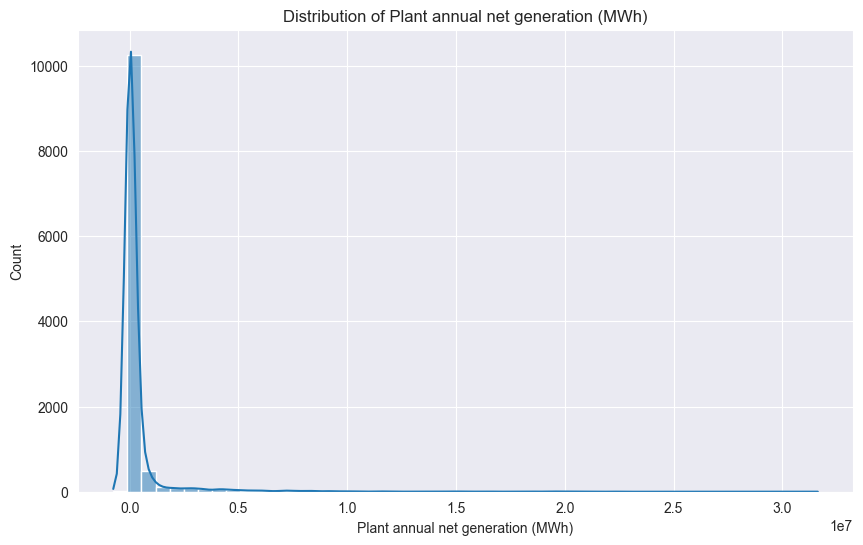

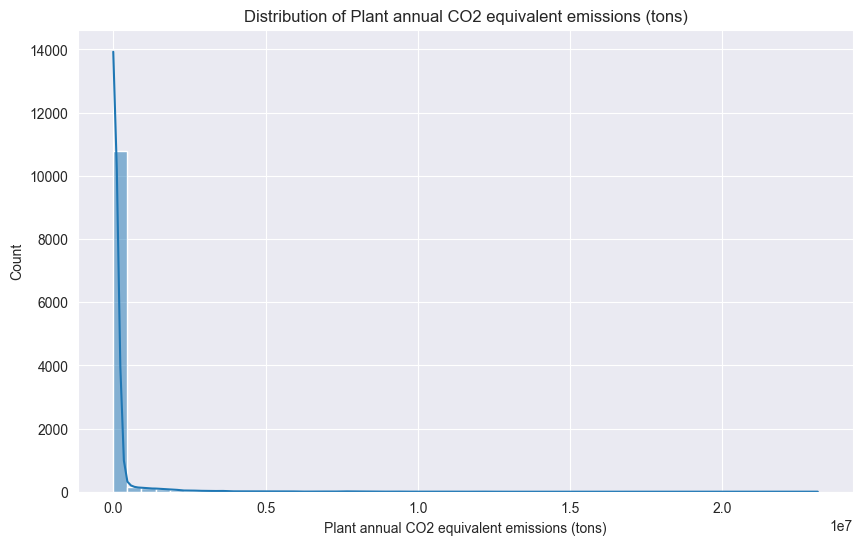

In [10]:
# Data distributions for key columns

for column in key_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(plnt21_data[column], bins=50, kde=True)
    plt.title(f'Distribution of {str(column)}')
    plt.show()


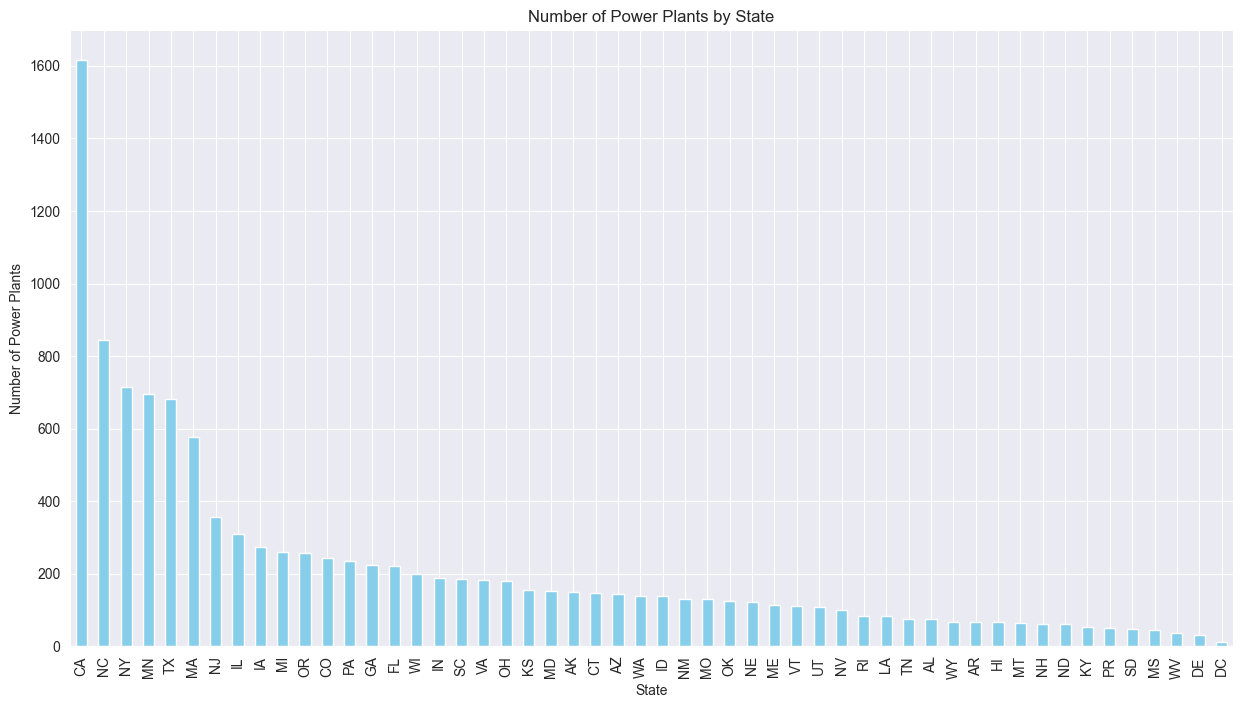

In [11]:
# Statewise analysis of power plants

# Number of power plants by state
statewise_counts = plnt21_data['Plant state abbreviation'].value_counts()
plt.figure(figsize=(15, 8))
statewise_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Power Plants by State')
plt.xlabel('State')
plt.ylabel('Number of Power Plants')
plt.show()


In [12]:
# Missing values analysis for ST21 data
st21_missing_data = st21_data.isnull().sum().sort_values(ascending=False)
st21_missing_percentage = (st21_data.isnull().sum()/st21_data.isnull().count()).sort_values(ascending=False)
st21_missing_stats = pd.concat([st21_missing_data, st21_missing_percentage], axis=1, keys=['Total', 'Percentage'])
st21_missing_stats.head(20)

,Total,Percentage
Data Year,0,0.0
State ozone season NOx non-baseload output emission rate (lb/MWh),0,0.0
State annual CO2 non-baseload output emission rate (lb/MWh),0,0.0
State annual CH4 non-baseload output emission rate (lb/MWh),0,0.0
State annual N2O non-baseload output emission rate (lb/MWh),0,0.0
State annual CO2 equivalent non-baseload output emission rate (lb/MWh),0,0.0
State annual Hg non-baseload output emission rate (lb/MWh),0,0.0
State annual coal net generation (MWh),0,0.0
State annual oil net generation (MWh),0,0.0
State annual gas net generation (MWh),0,0.0


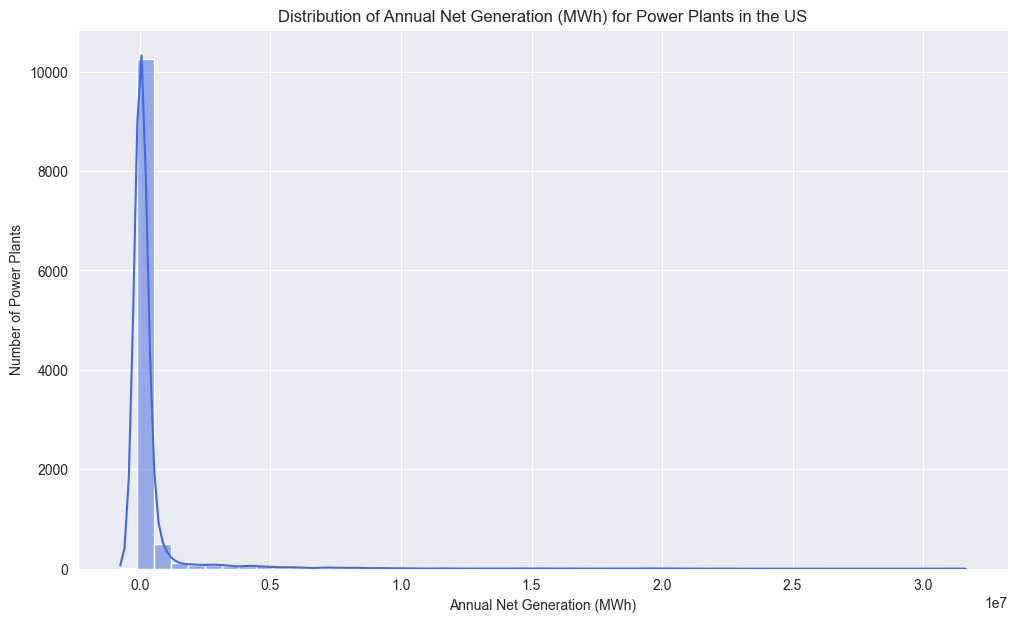

In [13]:
# Analysis of the Annual Net Generation of Power Plants in the US
annual_net_gen = plnt21_data['Plant annual net generation (MWh)']

plt.figure(figsize=(12, 7))
sns.histplot(annual_net_gen, bins=50, kde=True, color='royalblue')
plt.title('Distribution of Annual Net Generation (MWh) for Power Plants in the US')
plt.xlabel('Annual Net Generation (MWh)')
plt.ylabel('Number of Power Plants')
plt.grid(True)
plt.show()

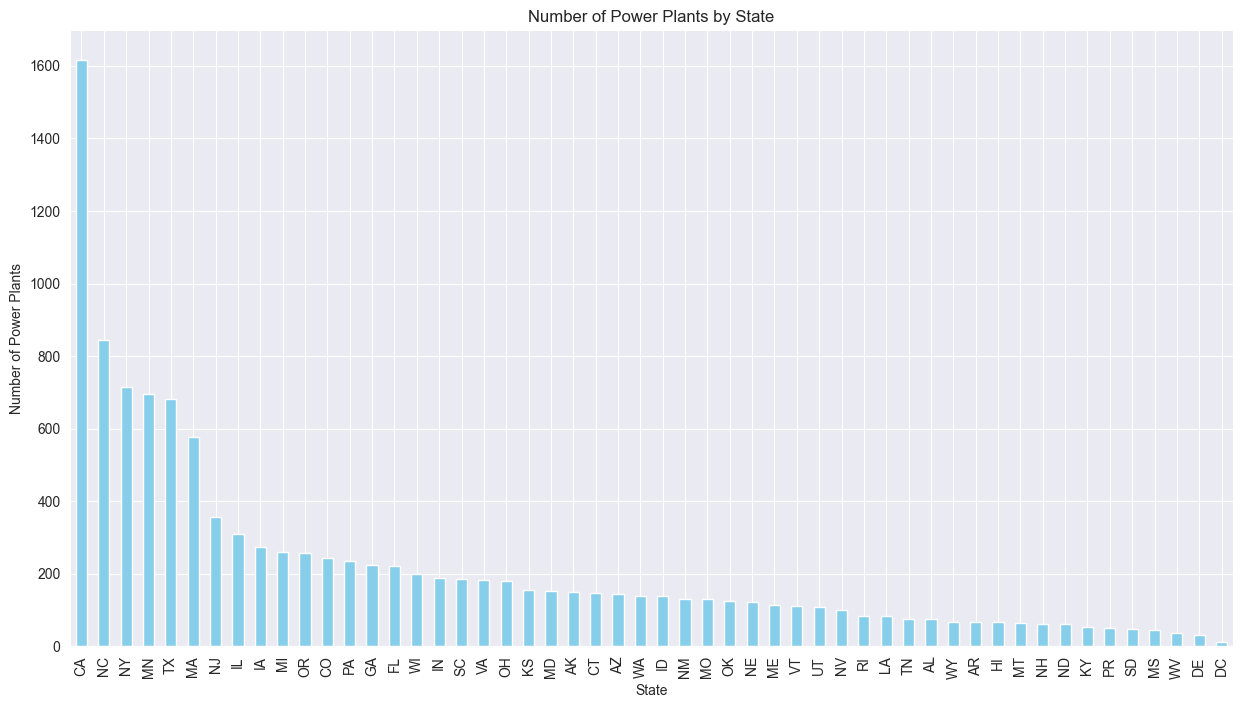

In [14]:
# Statewise Analysis: Breakdown of power plants by state
statewise_counts = plnt21_data['Plant state abbreviation'].value_counts()
plt.figure(figsize=(15, 8))
statewise_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Power Plants by State')
plt.xlabel('State')
plt.ylabel('Number of Power Plants')
plt.show()


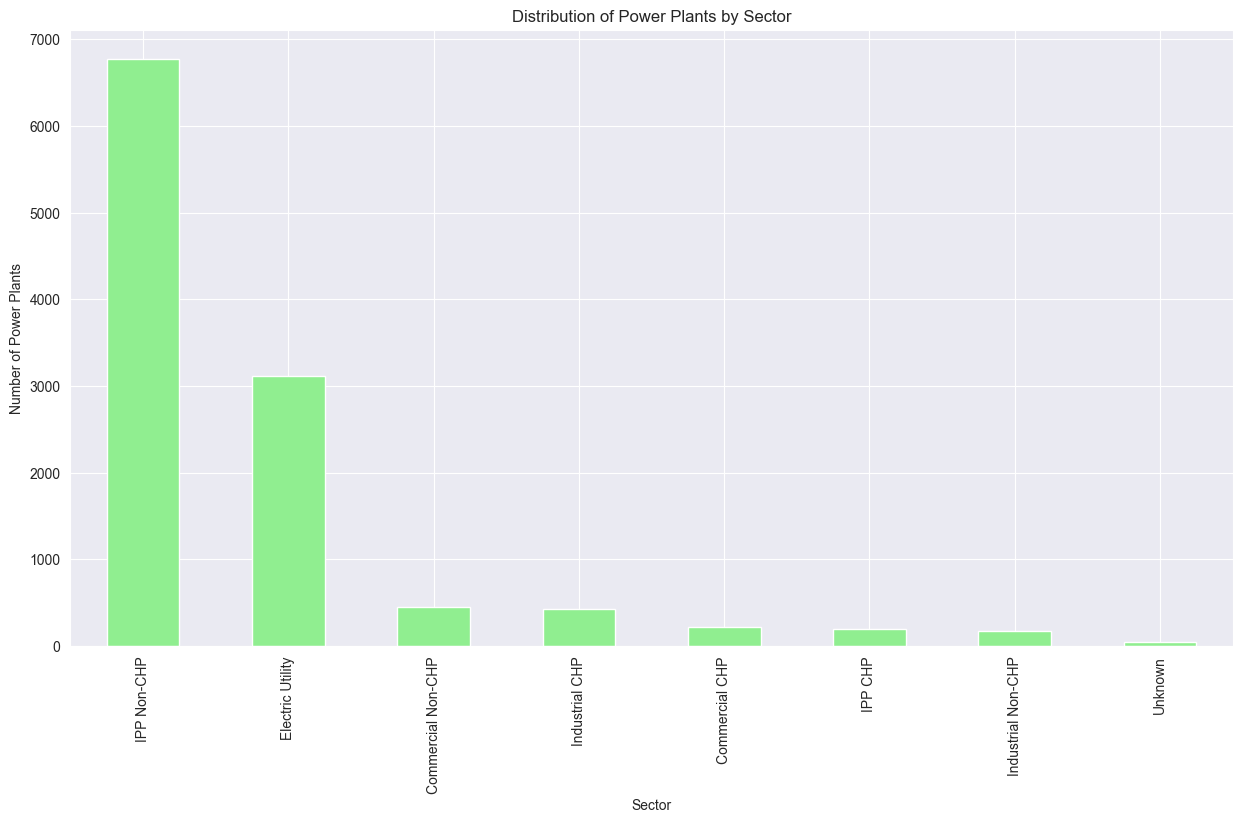

In [15]:
# Plant-level sector distribution analysis
sector_counts = plnt21_data['Plant-level sector'].value_counts()
plt.figure(figsize=(15, 8))
sector_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution of Power Plants by Sector')
plt.xlabel('Sector')
plt.ylabel('Number of Power Plants')
plt.show()


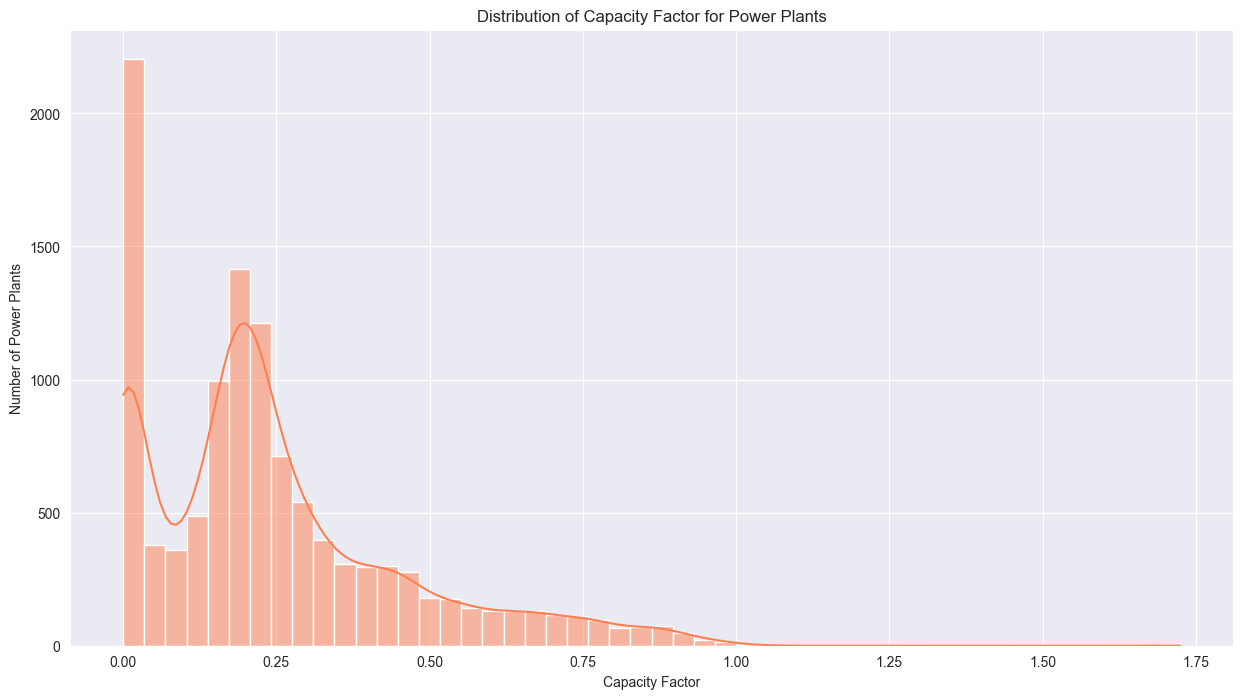

In [16]:
    # Capacity Factor Analysis
    plt.figure(figsize=(15, 8))
    sns.histplot(plnt21_data['Plant capacity factor'], bins=50, kde=True, color='coral')
    plt.title('Distribution of Capacity Factor for Power Plants')
    plt.xlabel('Capacity Factor')
    plt.ylabel('Number of Power Plants')
    plt.show()
    